In [2]:
import os
import time
import pandas as pd
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

In [64]:
from mylab.feature.myfeature import cal_feature

file_base_dir = "./data/"
file_child_dir = "exp3/phase2/"
# file_name = "2020-01-08-20-47 (1).csv"
# file = file_base_dir+file_child_dir+file_name

data_offset = 0
data_len = 100
start_time = int(1.578e9+87000)
end_time = int(1.5784e9+8500)

all_feature_df = pd.DataFrame()
for _,_,filenames in os.walk( file_base_dir+file_child_dir ):
    for file_name in filenames[:]:
        file = file_base_dir+file_child_dir+file_name
        acq_time = int(file_name[:-4].split("-")[-1])
        if acq_time < start_time or acq_time > end_time:
            continue
        df = pd.read_csv(file)
        df = df.loc[df.Tj_IGBT3_1 > 90, :]
        df = df.iloc[data_offset:data_offset+data_len, :]
        
        if df.shape[0]==data_len: # use the full data only
            df["IGBT3_1_delta_T"] = df["Tj_IGBT3_1"] - df["Tsink_IGBT3_1"]
            df["P"] = df["Ic"]*df["Uce"]
            
            feature_df1 = cal_feature(df,"IGBT3_1_delta_T")
            feature_df2 = cal_feature(df,"Uce")
            feature_df = pd.concat([feature_df1,feature_df2],axis = 1)
            
            feature_df["file_name"] = file_name
            feature_df["time"] = acq_time
            all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)
    
all_feature_df.sort_values(by = "time")
all_feature_df.to_csv("./temp/transient_resistance_features_df.csv", index = False)
all_feature_df.head(10)

,IGBT3_1_delta_T_min,IGBT3_1_delta_T_max,IGBT3_1_delta_T_range,IGBT3_1_delta_T_mean,IGBT3_1_delta_T_mode,IGBT3_1_delta_T_median,IGBT3_1_delta_T_quantile25,IGBT3_1_delta_T_quantile75,IGBT3_1_delta_T_std,IGBT3_1_delta_T_var,...,Uce_I,Uce_sf,Uce_MI,Uce_CF,Uce_llr,Uce_pi,Uce_sdif,Uce_cpt1,file_name,time
0,8.837547,38.906792,30.069244,33.901055,8.837547,35.766978,32.855812,37.537729,5.843657,34.148323,...,1.056290,1.000477,0.098434,0.098364,NaN,1.056290,0.032567,NaN,10000-30-86-170-86-1578273930.csv,1578273930
0,6.556280,38.841952,32.285673,33.799960,6.556280,35.739826,32.839446,37.591692,6.039758,36.478683,...,1.047890,1.000371,0.091830,0.091779,NaN,1.047890,0.028725,NaN,10001-30-86-169-86-1578273960.csv,1578273960
0,8.824829,38.973300,30.148471,33.977405,8.824829,35.733926,32.913017,37.592864,5.696372,32.448657,...,1.029987,1.000224,0.060928,0.060908,NaN,1.029987,0.022317,NaN,10002-30-86-170-86-1578273990.csv,1578273990
0,9.104205,38.959923,29.855718,33.929867,9.104205,35.721372,32.898997,37.612049,5.799531,33.634555,...,1.042906,1.000460,0.090506,0.090443,NaN,1.042906,0.031991,NaN,10003-30-86-170-86-1578274030.csv,1578274030
0,8.535774,38.945513,30.409739,33.835965,8.535774,35.794111,32.821358,37.569604,6.001184,36.014209,...,1.039658,1.000432,0.089448,0.089390,NaN,1.039658,0.031005,1.039884,10004-30-86-170-86-1578274060.csv,1578274060
0,8.654073,39.038984,30.384911,34.048500,8.654073,35.767454,32.984913,37.630103,5.670981,32.160027,...,1.042628,1.000401,0.088204,0.088151,NaN,1.042628,0.029840,NaN,10005-30-86-169-86-1578274090.csv,1578274090
0,8.543666,38.937276,30.393611,33.906329,8.543666,35.780543,32.823421,37.571500,5.807893,33.731625,...,1.038380,1.000281,0.082578,0.082543,NaN,1.038380,0.024876,NaN,10006-30-86-170-86-1578274120.csv,1578274120
0,8.497401,38.938560,30.441160,33.797387,8.497401,35.761848,32.789927,37.497422,6.005313,36.063785,...,1.029344,1.000164,0.056044,0.056030,NaN,1.029344,0.018992,1.029428,10007-31-86-170-86-1578274150.csv,1578274150
0,8.792300,39.035062,30.242762,33.977628,8.792300,35.769352,32.674380,37.651594,5.628258,31.677283,...,1.035945,1.000178,0.060632,0.060616,NaN,1.035945,0.019770,NaN,10008-31-86-169-86-1578274180.csv,1578274180
0,8.678190,38.837990,30.159800,33.836941,8.678190,35.635317,32.635286,37.546233,5.732342,32.859740,...,1.031852,1.000302,0.068133,0.068102,NaN,1.031852,0.025665,NaN,10009-31-86-170-86-1578274210.csv,1578274210


### plot

In [3]:
all_feature_df =pd.read_csv("./temp/transient_resistance_features_df.csv")
all_feature_df = all_feature_df.loc[all_feature_df.IGBT3_1_delta_T_CF.values <1.3, :]
all_feature_df = all_feature_df.loc[all_feature_df.IGBT3_1_delta_T_llr.values <2.2, :]
all_feature_df = all_feature_df.loc[all_feature_df.IGBT3_1_delta_T_kurt.values >4 , :]
all_feature_df = all_feature_df.loc[all_feature_df.IGBT3_1_delta_T_mode.values <13, :]  # delete outlier
all_feature_df.to_csv("./temp/transient_resistance_features_df_delete_outlier.csv", index = False)

for col in all_feature_df.columns:
    if True:#col[0]=="V":
        plt.figure(figsize = (8,5))
        plt.plot(all_feature_df[col].values)
        plt.title(col)
        plt.savefig("./picture/IGBT3_Rth_features/"+col+".jpg" )
        plt.close()

(0.5, 1.3)

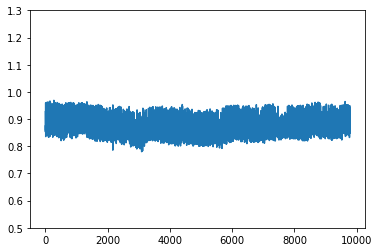

In [76]:
all_feature_df = all_feature_df.loc[all_feature_df.IGBT3_1_delta_T_CF.values <1.3, :]

all_feature_df.IGBT3_1_delta_T_CF.plot()
plt.ylim(0.5,1.3)

(5, 13)

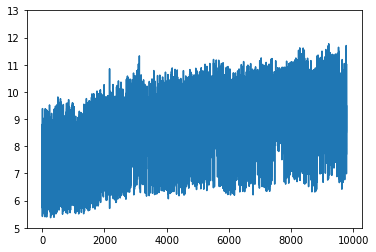

In [73]:
all_feature_df = all_feature_df.loc[all_feature_df.IGBT3_1_delta_T_mode.values <13, :]
all_feature_df.IGBT3_1_delta_T_mode.plot()
plt.ylim(5,13)

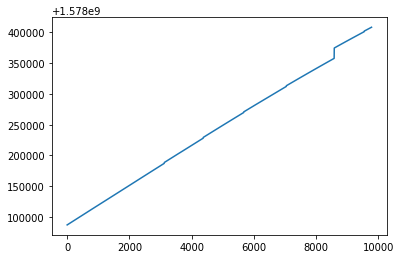

In [67]:
all_feature_df.time.plot()

In [61]:

int("1578293080")

1578293080